In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Intro Numpy

In [3]:
# 1d array
a= np.array([1,2,3])
b = np.array([2,3,4])

print(a.ndim)
print(a.size)
print(a.shape)

1
3
(3,)


In [5]:
# 2d arrays
a = np.array([[1,2,3],[3,4,5]])
b = np.array([[2,3,4],[9,2,1]])
a*b

array([[ 2,  6, 12],
       [27,  8,  5]])

In [6]:
# a vertcal array
f = np.array([[1],[2],[3]])
f

array([[1],
       [2],
       [3]])

In [8]:
np.append(a,b)

array([1, 2, 3, 3, 4, 5, 2, 3, 4, 9, 2, 1])

In [9]:
# adding an array vertically
v = np.array([[1,2,3,4],[5,6,7,8]])
g = np.array([8,9,0,1])

v = np.vstack((v,g))
v


array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [8, 9, 0, 1]])

In [16]:
# adding an array horizontally
v = np.array([[1,2,3,4],[5,6,7,8]])
g = np.array([[8],[1]])

v = np.hstack((v,g))
v

array([[1, 2, 3, 4, 8],
       [5, 6, 7, 8, 1]])

In [20]:
# flattening an arrain
d = v.flatten()
d

array([1, 2, 3, 4, 8, 5, 6, 7, 8, 1])

In [27]:
# Take sum row wise using axis = 0
print(a)
print('Vertically')
print(np.sum(a, axis = 0))
print('Horizontally')
np.sum(a, axis = 1)


[[1 2 3]
 [3 4 5]]
Vertically
[4 6 8]
Horizontally


array([ 6, 12])

# Univariate regression

## Read Data

In [36]:
data = pd.read_csv('Data/week_1-ex_1.txt', header=None)
data.columns = ['X','y']
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Preprocessing

In [43]:
X = data.X
y = data.y

X0 = np.ones(len(y))

theta = np.zeros((2))

X = np.vstack((X0, X))
# X

## Regression

In [46]:
def regression(X, theta):
    return np.dot(theta, X)

## Cost Function

In [50]:
def cost_function(X, theta, y):
    return 1/(2*len(y)) * np.sum((regression(X, theta) - y)**2)

In [62]:
theta = np.array([-1.0,2.0])

cost_function(X, theta, y)

54.24245508201238

## Gradient Descent

In [98]:
def gradient_descent(X, y, theta, n_iters, lr):
    m = len(y)
    errors = []
    theta = np.zeros((2))
    for i in range(n_iters):
        
        y_hat = regression(X, theta)
        error = cost_function(X, theta, y)
        errors.append(error)
        delta = (np.dot((y_hat-y),X.T)/m)*lr
        theta -= delta

    return theta, errors

In [100]:
n_iters = 1500
lr = 0.01

theta, errors = gradient_descent(X = X, y = y, theta = theta, n_iters = n_iters, lr = lr)

theta

array([-3.63029144,  1.16636235])

In [101]:
ypred = regression(X,theta)

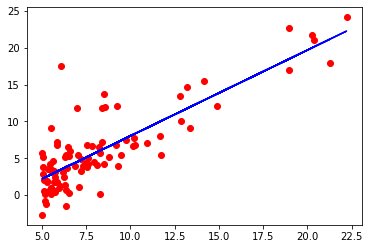

In [102]:
plt.plot(X[1],ypred,markersize = 10,color = 'b',label = 'Predicted')
plt.scatter(X[1],y,color = 'r',label = 'Actual')
plt.show()

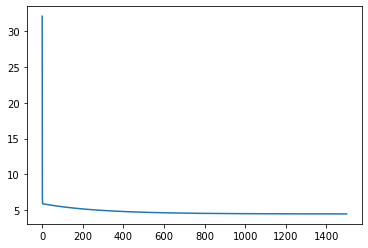

In [104]:
plt.plot(errors)